In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

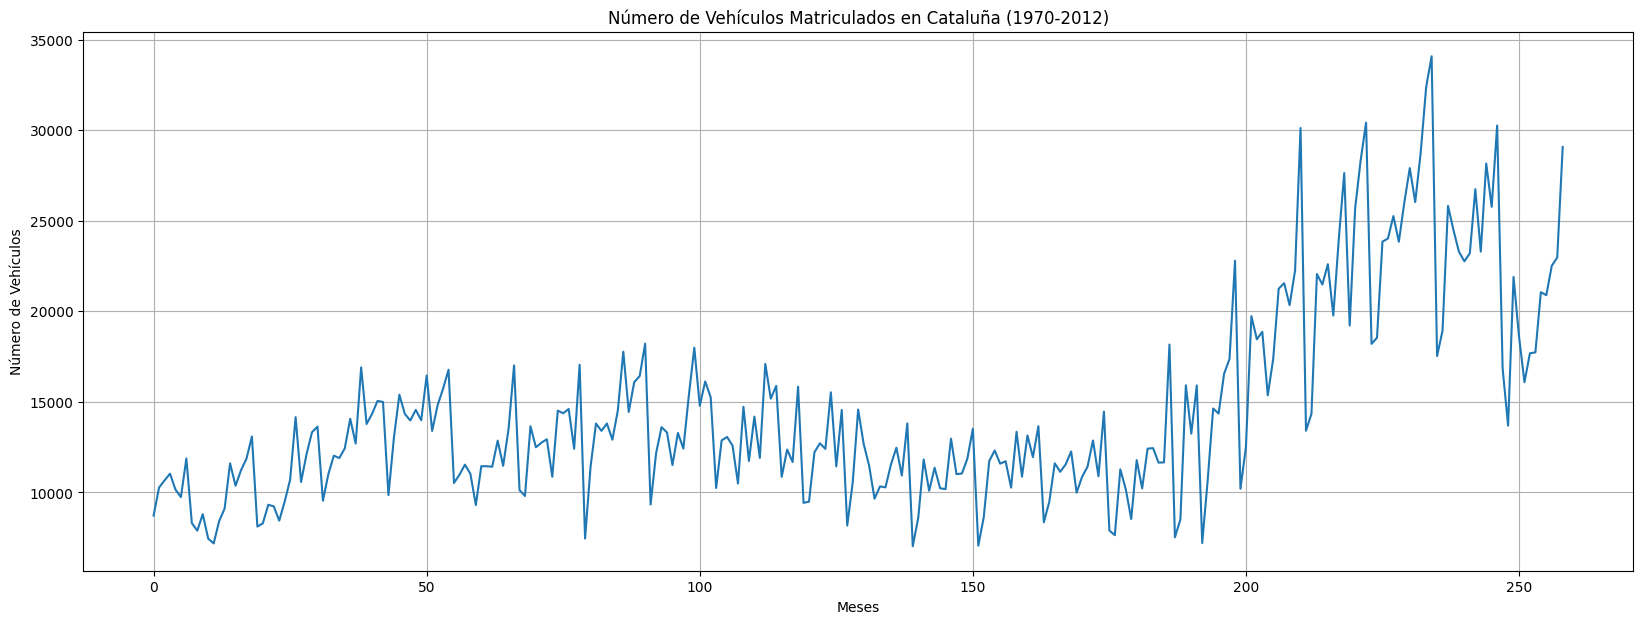

In [2]:
# Datos
data = [8724, 10273, 10666, 11036, 10161, 9743, 11876, 8309, 7892, 8801, 7450, 7186, 8418, 9110, 11607, 
        10372, 11223, 11863, 13089, 8116, 8297, 9321, 9234, 8445, 9494, 10709, 14159, 10582, 12111, 13324, 
        13634, 9544, 11016, 12032, 11901, 12431, 14067, 12701, 16905, 13778, 14341, 15054, 14997, 9856, 13027, 
        15399, 14335, 13974, 14559, 13988, 16459, 13398, 14813, 15727, 16777, 10524, 10977, 11535, 11032, 9306, 
        11450, 11447, 11422, 12865, 11469, 13529, 17016, 10130, 9807, 13655, 12495, 12747, 12937, 10867, 14516, 
        14374, 14608, 12413, 17051, 7456, 11405, 13806, 13402, 13807, 12914, 14529, 17770, 14449, 16091, 16425,
        18217, 9335, 12160, 13606, 13313, 11512, 13288, 12420, 15359, 17991, 14788, 16128, 15253, 10246, 12873,
        13063, 12590, 10493, 14729, 11737, 14187, 11908, 17098, 15181, 15882, 10862, 12369, 11682, 15839, 9425, 
        9492, 12226, 12714, 12404, 15530, 11438, 14554, 8170, 10538, 14576, 12695, 11492, 9657, 10334, 10281, 
        11537, 12471, 10939, 13814, 7032, 8589, 11821, 10094, 11365, 10234, 10182, 12972, 11010, 11048, 11874, 
        13513, 7062, 8640, 11733, 12317, 11591, 11722, 10269, 13351, 10871, 13148, 11949, 13661, 8356, 9492, 11609, 
        11142, 11550, 12265, 9991, 10861, 11426, 12870, 10891, 14464, 7899, 7643, 11279, 10177, 8536, 11786, 10228, 
        12420, 12446, 11648, 11659, 18167, 7525, 8506, 15915, 13248, 15909, 7210, 10681, 14634, 14356, 16551, 17376, 
        22797, 10204, 12513, 19732, 18458, 18867, 15363, 17383, 21249, 21555, 20342, 22260, 30121, 13408, 14345, 22060, 
        21480, 22603, 19768, 23975, 27634, 19217, 25698, 28324, 30418, 18205, 18544, 23849, 24018, 25258, 23843, 26004, 
        27906, 26034, 28759, 32381, 34085, 17530, 18939, 25824, 24485, 23296, 22763, 23213, 26745, 23296, 28160, 25769, 
        30262, 16853, 13691, 21898, 18618, 16088, 17684, 17735, 21058, 20892, 22519, 22973, 29076]

# Graficar la serie temporal
plt.figure(figsize=(20,7))
plt.plot(data)
plt.title('Número de Vehículos Matriculados en Cataluña (1970-2012)')
plt.xlabel('Meses')
plt.ylabel('Número de Vehículos')
plt.grid(True)
plt.show()

In [3]:
model = auto_arima(data, seasonal=False)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2434.745
Date:                Wed, 12 Jun 2024   AIC                           4877.490
Time:                        16:07:53   BIC                           4891.702
Sample:                             0   HQIC                          4883.205
                                - 259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     57.2118     47.951      1.193      0.233     -36.770     151.193
ma.L1         -0.6198      0.045    -13.718      0.000      -0.708      -0.531
ma.L2         -0.1762      0.055     -3.228      0.0

In [5]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_size = int(len(data) * 0.8)  # Proporción del 80% para entrenamiento
train_data = data[:train_size]
test_data = data[train_size:]

p=0
d=1
q=2

# Ajustar el modelo ARIMA al conjunto de entrenamiento
model = SARIMAX(train_data, order=(p, d, q)).fit()

# Imprimir el resumen del modelo
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18147D+00    |proj g|=  1.26840D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.647D-05   9.181D+00
  F =   9.1813755510601709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  207
Model:               SARIMAX(0, 1, 2

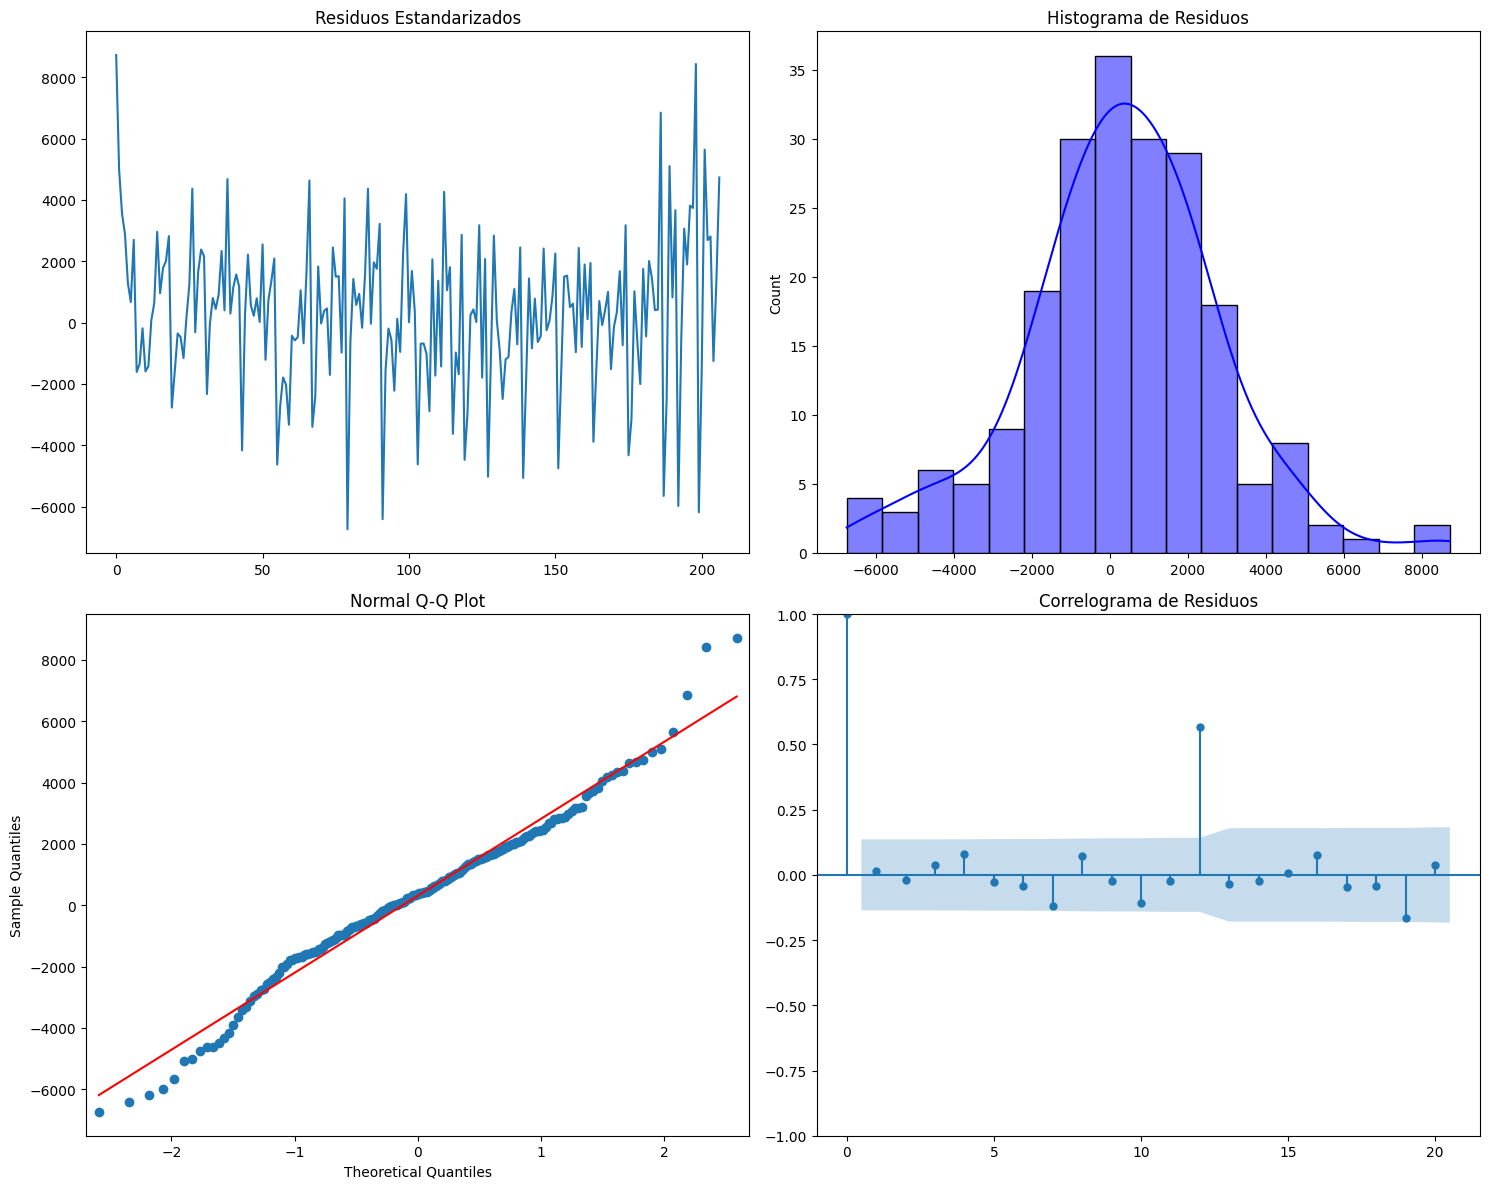

In [6]:
# Obtener los residuos del modelo
residuals = model.resid

# Crear subgráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Gráfico de residuos estandarizados
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Residuos Estandarizados')

# Histograma comparado con la normal
sns.histplot(residuals, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Histograma de Residuos')

# Normal Q-Q plot
qqplot(residuals, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q Plot')

# Correlograma de los residuos
plot_acf(residuals, lags=20, ax=axes[1, 1])
axes[1, 1].set_title('Correlograma de Residuos')

plt.tight_layout()
plt.show()

In [7]:
predictions = model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

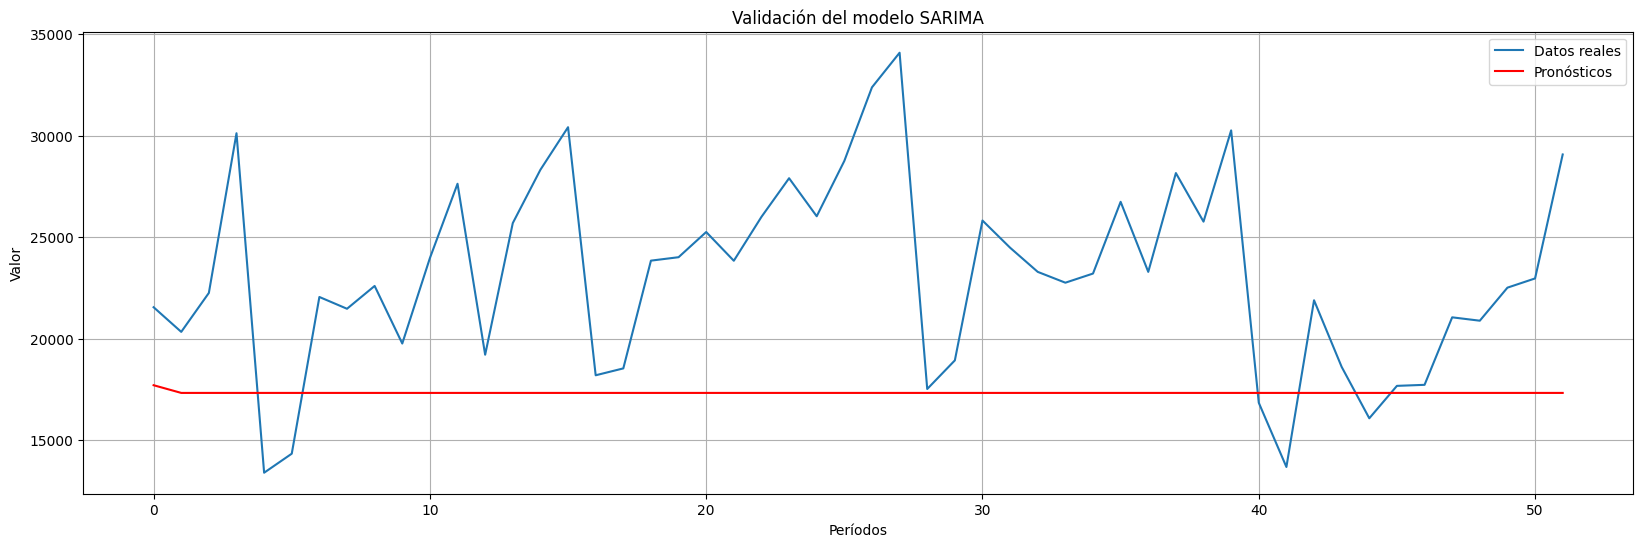

In [8]:
# Gráfico de pronósticos vs datos reales
plt.figure(figsize=(20, 6))
plt.plot(test_data, label='Datos reales')
plt.plot(predictions, color='red', label='Pronósticos')
plt.title('Validación del modelo SARIMA')
plt.xlabel('Períodos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

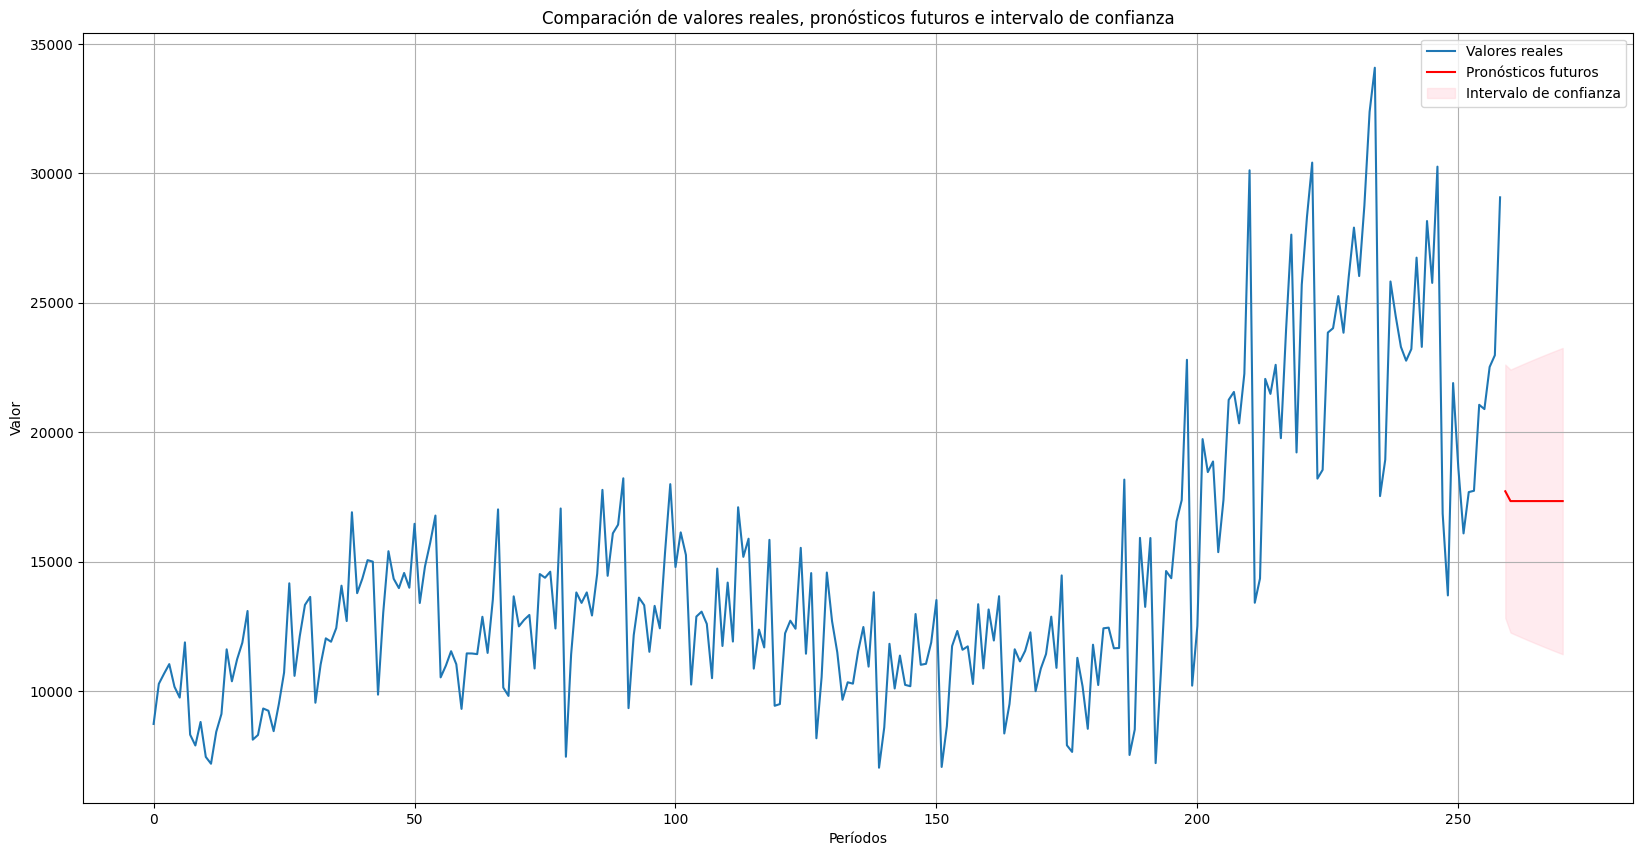

In [9]:
# Número de períodos que deseas pronosticar en el futuro
num_periods = 12  # Por ejemplo, pronóstico para los próximos 12 meses

# Pronósticos futuros utilizando el modelo SARIMA
forecast = model.forecast(steps=num_periods)

# Calcular intervalos de confianza
forecast_values = forecast
confidence_intervals = model.get_forecast(steps=num_periods).conf_int()

# Crear un rango de índices para los períodos pronosticados
index_forecast = range(len(data), len(data) + num_periods)

# Graficar los valores reales, los pronósticos futuros y los intervalos de confianza
plt.figure(figsize=(20, 10))
plt.plot(data, label='Valores reales')
plt.plot(index_forecast, forecast_values, color='red', label='Pronósticos futuros')
plt.fill_between(index_forecast, confidence_intervals[:, 0], confidence_intervals[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Comparación de valores reales, pronósticos futuros e intervalo de confianza')
plt.xlabel('Períodos')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Crear un DataFrame con los valores reales y los pronósticos
df_forecast = pd.DataFrame({'Valores reales': data[-num_periods:], 'Pronósticos futuros': forecast_values})

# Mostrar el DataFrame
print(df_forecast)

    Valores reales  Pronósticos futuros
0            16853         17715.803189
1            13691         17336.937126
2            21898         17336.937126
3            18618         17336.937126
4            16088         17336.937126
5            17684         17336.937126
6            17735         17336.937126
7            21058         17336.937126
8            20892         17336.937126
9            22519         17336.937126
10           22973         17336.937126
11           29076         17336.937126


In [11]:
# Tomar los últimos 12 meses de los datos originales como datos de prueba
test_data = data[-num_periods:]

# Calcular métricas de evaluación
mse = mean_squared_error(test_data, forecast_values)
mae = mean_absolute_error(test_data, forecast_values)
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100

# Imprimir métricas
print("Error cuadrático medio (MSE)", mse)
print("Error absoluto medio (MAE):", mae)
print("Error porcentual absoluto medio (MAPE):", mape)

Error cuadrático medio (MSE) 21769151.051587667
Error absoluto medio (MAE): 3514.853609166961
Error porcentual absoluto medio (MAPE): 16.169623080568936
